In [10]:
import plotting_tools as pt
import utils

import numpy as np

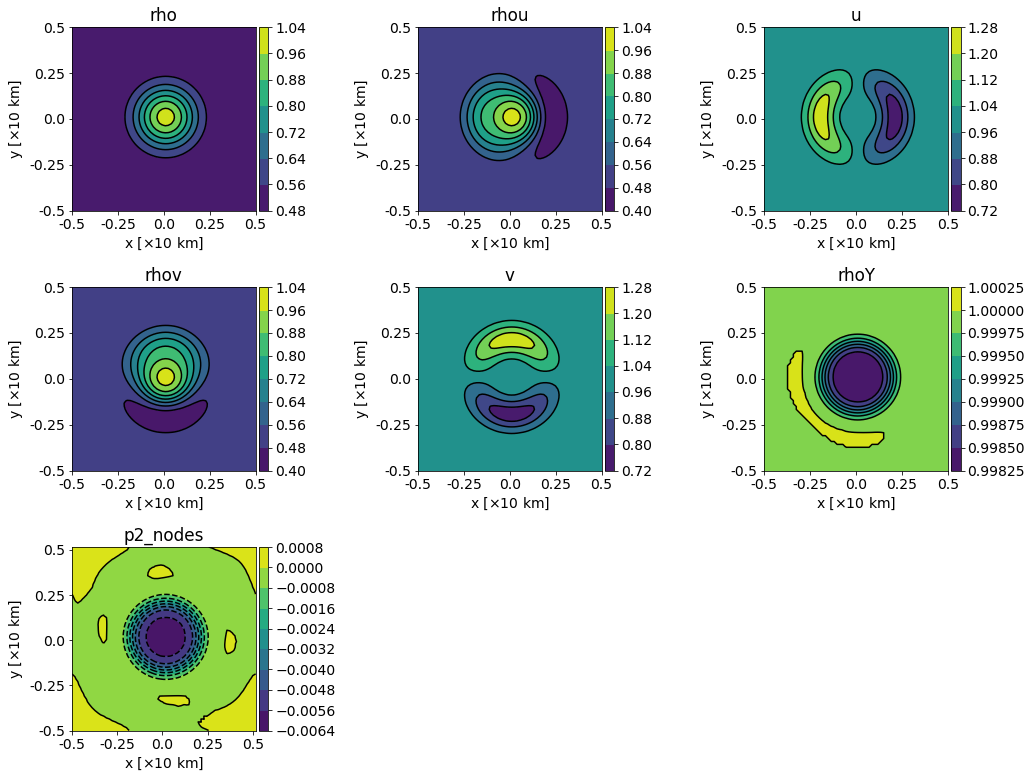

In [14]:
# quantities to read
attributes = ['rho', 'rhou', 'rhov', 'rhoY', 'p2_nodes']

# end time and grid-size of the simulation
et = 1.0
Nx, Ny = 64, 64

# the base filename of the output file
base_fn = "output_travelling_vortex" 

# path to the output file
directory = "output_travelling_vortex"
py_directory = "../%s/" %directory

# load the output arrays
tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)

# time label time, 'TIME by default'
l_typ = 'TIME'
# tag == 'after_full_step' by default
tag = tc.get_tag_dict()[9]

# get output at this time
times = [0.01]

# load plot titles
attr_labels = pt.labels_increment()

def get_ens(tc, sfx , diff, attribute, swe=True):
    ens = tc.get_ensemble(times, 1, attribute, sfx, label_type=l_typ, avg=True, diff=diff, tag=tag)[1]
    return ens

diff = False
# `aux` tag of the filename
sfx1 = 'comp_bal'

ll = []
# loop through all the attributes and store them for plotting
for acnt, attribute in enumerate(attributes):
    a2 = get_ens(tc, sfx1, diff, attribute, swe=False)
    ll.append([a2,attribute])
    
    # recover velocity fields from momenta and density fields.
    if attribute == 'rho':
        rho = np.copy(a2)
    if attribute == 'rhou' or attribute == 'rhov':
        vel = a2/rho
        ll.append([vel,attribute[-1]])

# Setup plotter
pl = pt.plotter(ll,ncols=3,figsize=(15,12),sharey=False)

# plot settings
x_axs = [-0.5,-0.25,0.0,0.25,0.5]
y_axs = [-0.5,-0.25,0.0,0.25,0.5]
x_loc = np.linspace(0,Nx-1,5)
y_loc = np.linspace(0,Ny-1,5)
x_label = r'x [$\times 10$ km]'
y_label = r'y [$\times 10$ km]'

pl.set_axes(x_locs=x_loc, y_locs=y_loc, x_axs=x_axs, y_axs=y_axs, x_label=x_label, y_label=y_label)

# plot arrays of each attribute
_ = pl.plot(aspect='equal',method='contour')

# save a pdf output
pl.save_fig('first_results')